In [1]:
import pandas as pd
import numpy as np

In [3]:
dates = pd.date_range('2015-1-1', periods = 100, freq="M")

In [8]:

df = pd.DataFrame(np.random.standard_normal([9, 4]))
np.array(df).round(6)

array([[ 0.59259 , -1.961419,  0.95559 , -1.61061 ],
       [-0.139605,  2.293389, -0.696213,  0.179311],
       [ 0.572599, -0.857244,  0.121958, -0.12002 ],
       [-0.328863, -0.873578, -0.67023 , -0.311689],
       [-1.403701,  1.605031,  0.174555, -0.099395],
       [-0.810781, -0.13525 ,  0.675035,  1.801924],
       [ 1.361321, -0.032073,  0.085798, -0.149322],
       [ 0.544815,  1.055588, -1.01786 ,  0.107261],
       [ 1.969302,  1.666456, -1.646634, -0.32226 ]])

In [9]:
df.index = dates[:9]

In [11]:
df.columns = [["Var1", "Var2", "Var3", "Var4"]]

In [12]:
df

,Var1,Var2,Var3,Var4
2015-01-31,0.592590,-1.961419,0.955590,-1.610610
2015-02-28,-0.139605,2.293389,-0.696213,0.179311
2015-03-31,0.572599,-0.857244,0.121958,-0.120020
2015-04-30,-0.328863,-0.873578,-0.670230,-0.311689
2015-05-31,-1.403701,1.605031,0.174555,-0.099395
2015-06-30,-0.810781,-0.135250,0.675035,1.801924
2015-07-31,1.361321,-0.032073,0.085798,-0.149322
2015-08-31,0.544815,1.055588,-1.017860,0.107261
2015-09-30,1.969302,1.666456,-1.646634,-0.322260


In [15]:
df.describe()

,Var1,Var2,Var3,Var4
count,9.000000,9.000000,9.000000,9.000000
mean,0.261964,0.306767,-0.224222,-0.058311
std,1.051484,1.424984,0.840417,0.873329
min,-1.403701,-1.961419,-1.646634,-1.610610
25%,-0.328863,-0.857244,-0.696213,-0.311689
50%,0.544815,-0.032073,0.085798,-0.120020
75%,0.592590,1.605031,0.174555,0.107261
max,1.969302,2.293389,0.955590,1.801924


In [16]:
df.cumsum()

,Var1,Var2,Var3,Var4
2015-01-31,0.592590,-1.961419,0.955590,-1.610610
2015-02-28,0.452985,0.331970,0.259378,-1.431299
2015-03-31,1.025584,-0.525274,0.381336,-1.551319
2015-04-30,0.696721,-1.398852,-0.288894,-1.863008
2015-05-31,-0.706980,0.206179,-0.114339,-1.962403
2015-06-30,-1.517761,0.070929,0.560696,-0.160479
2015-07-31,-0.156440,0.038855,0.646494,-0.309801
2015-08-31,0.388375,1.094444,-0.371366,-0.202540
2015-09-30,2.357677,2.760900,-2.018000,-0.524800


In [17]:
%matplotlib inline

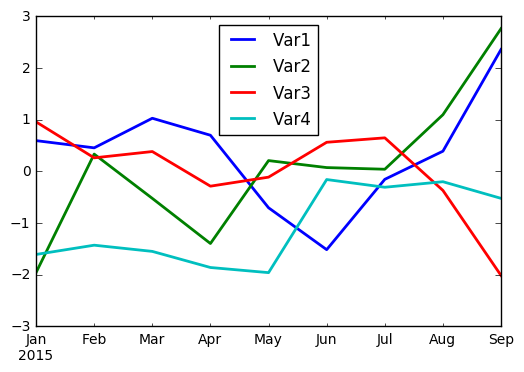

In [18]:
df.cumsum().plot(lw=2.0)

## Series Class


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
type(df["Var1"])

pandas.core.series.Series

In [22]:
import matplotlib.pyplot as plt

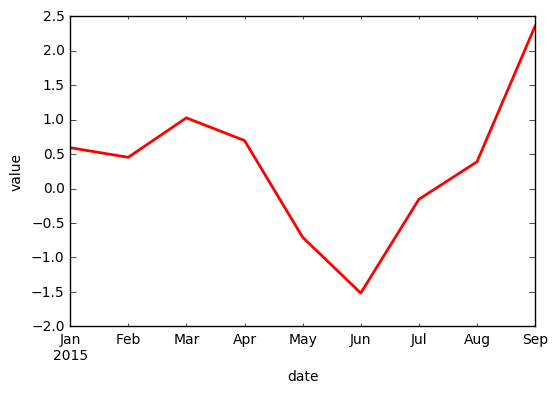

In [23]:
df["Var1"].cumsum().plot(style="r", lw=2)
plt.xlabel('date')
plt.ylabel('value')

## GroupBy Operations

In [27]:
df['Quarter'] = ['Q1','Q1','Q1','Q2', 'Q2', 'Q2', 'Q3','Q3','Q3']

In [28]:
groups = df.groupby('Quarter')

In [29]:
groups.mean()

,Var1,Var2,Var3,Var4
Quarter,,,,
Q1,0.341861,-0.175091,0.127112,-0.517106
Q2,-0.847782,0.198734,0.059787,0.463613
Q3,1.291813,0.896657,-0.859565,-0.121440


In [30]:
groups.max()

,Var1,Var2,Var3,Var4
Quarter,,,,
Q1,0.592590,2.293389,0.955590,0.179311
Q2,-0.328863,1.605031,0.675035,1.801924
Q3,1.969302,1.666456,0.085798,0.107261


In [31]:
df.groupby('Quarter').mean()

,Var1,Var2,Var3,Var4
Quarter,,,,
Q1,0.341861,-0.175091,0.127112,-0.517106
Q2,-0.847782,0.198734,0.059787,0.463613
Q3,1.291813,0.896657,-0.859565,-0.121440


In [32]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [33]:
df['Odd_Even'] = ['Odd', 'Even','Odd', 'Even','Odd', 'Even','Odd', 'Even', 'Odd']

In [35]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [36]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [37]:
groups.mean()

Var1      Var2      Var3      Var4
Quarter Odd_Even                                        
Q1      Even     -0.139605  2.293389 -0.696213  0.179311
        Odd       0.582595 -1.409331  0.538774 -0.865315
Q2      Even     -0.569822 -0.504414  0.002403  0.745117
        Odd      -1.403701  1.605031  0.174555 -0.099395
Q3      Even      0.544815  1.055588 -1.017860  0.107261
        Odd       1.665311  0.817191 -0.780418 -0.235791

## Financial Data 

In [42]:
import pandas_datareader.data as web

In [43]:
amzn = web.get_quote_yahoo('AMZN')

In [44]:
amzn

,PE,change_pct,last,short_ratio,time
AMZN,182.46,-0.06%,796.44,1.59,1:13pm


In [48]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                    start='2000-1-1')

In [49]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4337 entries, 2000-01-03 to 2017-01-09
Data columns (total 6 columns):
Open         4337 non-null float64
High         4337 non-null float64
Low          4337 non-null float64
Close        4337 non-null float64
Volume       4337 non-null int64
Adj Close    4337 non-null float64
dtypes: float64(5), int64(1)
memory usage: 237.2 KB


In [51]:
DAX.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [52]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,11631.700195,11637.370117,11561.230469,11584.240234,88413500,11584.240234
2017-01-04,11609.530273,11616.089844,11531.429688,11584.309570,82173600,11584.309570
2017-01-05,11537.730469,11602.540039,11537.400391,11584.940430,74924900,11584.940430
2017-01-06,11560.519531,11605.740234,11547.049805,11599.009766,67084900,11599.009766
2017-01-09,11606.889648,11606.889648,11522.349609,11563.990234,78728200,11563.990234


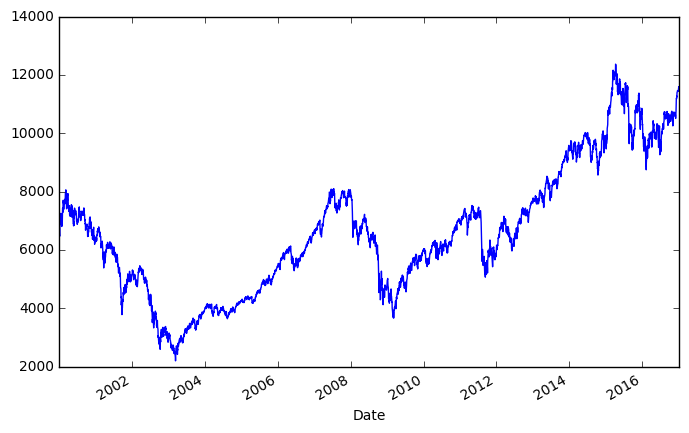

In [53]:
DAX['Close'].plot(figsize=(8,5))

In [56]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


CPU times: user 2min 19s, sys: 16 ms, total: 2min 19s
Wall time: 2min 19s


In [57]:
DAX['Ret_Loop']

Date
2000-01-03    0.000000
2000-01-04   -0.024565
2000-01-05   -0.012970
2000-01-06   -0.004184
2000-01-07    0.046182
2000-01-10    0.021094
2000-01-11   -0.004961
2000-01-12    0.003124
2000-01-13    0.006225
2000-01-14    0.030753
2000-01-17    0.011874
2000-01-18   -0.026068
2000-01-19    0.002672
2000-01-20    0.003044
2000-01-21   -0.017002
2000-01-24   -0.008727
2000-01-25   -0.017808
2000-01-26    0.023186
2000-01-27    0.022243
2000-01-28   -0.008389
2000-01-31   -0.033235
2000-02-01    0.030949
2000-02-02    0.017085
2000-02-03    0.025102
2000-02-04    0.012211
2000-02-07   -0.020120
2000-02-08    0.034162
2000-02-09    0.010440
2000-02-10    0.010452
2000-02-11   -0.012757
                ...   
2016-11-28   -0.010958
2016-11-29    0.003567
2016-11-30    0.001863
2016-12-01   -0.010036
2016-12-02   -0.001967
2016-12-05    0.016179
2016-12-06    0.008433
2016-12-07    0.019426
2016-12-08    0.017390
2016-12-09    0.002163
2016-12-12   -0.001199
2016-12-13    0.008404
2016-1

In [ ]:
DAX[['Close', 'Ret_Lopp']].tail()